# Kaggle Competition - Season 4 Episode 11

## Initial look at data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
og = pd.read_csv('./final_depression_dataset_1.csv')
train.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [3]:
print(f'Size of train data: {train.shape}')
print(f'Size of test data: {test.shape}')
print(f'Size of og data: {og.shape}')

Size of train data: (140700, 20)
Size of test data: (93800, 19)
Size of og data: (2556, 19)


Checking for unique values for every feature

In [4]:
unique_vals_df = pd.DataFrame({'train': train.nunique(), 'test': test.nunique(), 'og': og.nunique()})
unique_vals_df

train     test     og
Academic Pressure                           5      5.0    5.0
Age                                        43     44.0   43.0
CGPA                                      331    326.0  312.0
City                                       98     68.0   30.0
Degree                                    115     87.0   27.0
Depression                                  2      NaN    2.0
Dietary Habits                             23     22.0    3.0
Family History of Mental Illness            2      2.0    2.0
Financial Stress                            5      5.0    5.0
Gender                                      2      2.0    2.0
Have you ever had suicidal thoughts ?       2      2.0    2.0
Job Satisfaction                            5      5.0    5.0
Name                                      422    374.0  216.0
Profession                                 64     64.0   35.0
Sleep Duration                             36     31.0    4.0
Study Satisfaction                          5      5.0    5.0
Work Pressure                               5      5.0    5.0
Work/Study Hours                           13     13.0   13.0
Working Professional or Student             2      2.0    2.0
id                                     140700  93800.0    NaN

In [5]:
dropping_cols = ['id','Name', 'Academic Pressure', 'CGPA', 'Study Satisfaction']  #Removed the last three features since they have a lot of missing values
# Check if columns exist in the dataframe before dropping them to safegaurd against repeated runs
dropping_cols = [col for col in dropping_cols if col in train.columns]
train.drop(dropping_cols, inplace=True, axis=1)
test.drop(dropping_cols, inplace=True, axis=1)
og.drop(dropping_cols[1:], inplace=True, axis=1)

Create a copy of the dataframe

In [6]:
temp_og = og.copy()
temp_test = test.copy()
temp_train = train.copy()

In [7]:
train.isnull().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Work Pressure                            27918
Job Satisfaction                         27910
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64

## Explore the data

### Clean data

##### For degree

In [ ]:
import re

og_degree_list = og['Degree'].unique()
exclusive_train_degree_list = train['Degree'][~train['Degree'].isin(og_degree_list)].unique()
exclusive_test_degree_list = test['Degree'][~test['Degree'].isin(og_degree_list)].unique()

# We need to clean this list
def clean_string(input_string):
    return re.sub(r'[^a-z0-9]', '', str(input_string).lower())

final_degree_list = set(map(clean_string, og_degree_list))

# Now I will manually add the degrees which are valid
manual_degree_list = [
    'MPA', 'BEd', 'B.Sc', 'Class 11', 'BPharm', 'M.Arch', 'MPharm', 'BArch',
    'MTech', 'BPA', 'MEd', 'M_Tech', 'B.Ed', 'BTech', 'BArch', 'M.Arch', 'B.Sc',
    'B_Com', 'B.BA', 'BEd'
]
manual_degree_list = set(map(clean_string, manual_degree_list))
final_degree_list = final_degree_list.union(manual_degree_list)

In [53]:
# Now, I will first clean the Degree column in the train and test dataframes
train['Degree'] = train['Degree'].apply(lambda x: clean_string(x))
test['Degree'] = test['Degree'].apply(lambda x: clean_string(x))
og['Degree'] = og['Degree'].apply(lambda x: clean_string(x))

#Now, I will replace the values in the Degree column in the train and test dataframes with null values if they are not in the final_degree_list
train['Degree'] = train['Degree'].apply(lambda x: x if x in final_degree_list else None)
test['Degree'] = test['Degree'].apply(lambda x: x if x in final_degree_list else None)
og['Degree'] = og['Degree'].apply(lambda x: x if x in final_degree_list else None)

##### For Profession

In [74]:
# train['Degree'].unique()
# test['Degree'].unique()
# og['Degree'].unique()

from typing import final


exclusive_train_profession_list = train['Profession'].unique()[~np.isin(train['Profession'].unique(), og['Profession'].unique())]
exclusive_test_profession_list = test['Profession'].unique()[~np.isin(test['Profession'].unique(), og['Profession'].unique())]
final_profession_list = set(og['Profession'].unique())
final_profession_list = final_profession_list.union(['Unemployed', 'Family Consultant', 'Student', 'City Manager'])

#Process the final profession list
final_profession_list = set(map(clean_string, final_profession_list))

In [75]:
#Now, I will first clean the Profession column in the train and test dataframes
train['Profession'] = train['Profession'].apply(lambda x: clean_string(x))
test['Profession'] = test['Profession'].apply(lambda x: clean_string(x))
og['Profession'] = og['Profession'].apply(lambda x: clean_string(x))

#Now, I will replace the values in the Profession column in the train and test dataframes with null values if they are not in the final_profession_list
train['Profession'] = train['Profession'].apply(lambda x: x if x in final_profession_list else None)
test['Profession'] = test['Profession'].apply(lambda x: x if x in final_profession_list else None)
og['Profession'] = og['Profession'].apply(lambda x: x if x in final_profession_list else None)

##### Age

d:\Anaconda\anafiles\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

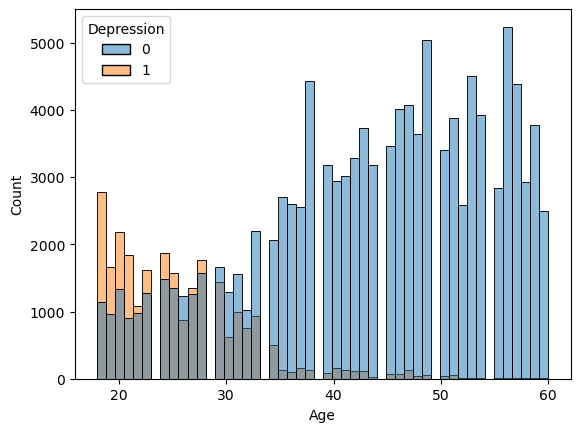

In [88]:
#Lets check age
train['Age'].astype(int)

#Lets check for corr between the age and the target
sns.histplot(data=train, x='Age', hue='Depression')

#Sure, it has negetive correlation with the target

##### City

In [89]:
#Lets check the city now
train['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

### Missing values

In [31]:
#Dataframe of missing values
#Checking missing values
missing_vals_df = pd.DataFrame({'train': train.isnull().sum().loc[train.isnull().sum()!= 0], 
                                'test': test.isnull().sum().loc[test.isnull().sum()!= 0], 
                                'og': og.isnull().sum().loc[og.isnull().sum()!= 0]
                                })

missing_vals_df

train     test     og
Degree                2      2.0    NaN
Dietary Habits        4      5.0    NaN
Financial Stress      4      NaN    NaN
Job Satisfaction  27910  18774.0  502.0
Profession        36630  24632.0  673.0
Work Pressure     27918  18778.0  502.0

Check the nature of these cols

- Degree - Categorical
- Profession - Categorical
- Work pressure - Numerical
- Job satisfaction - Numerical
- Dietary Habits - Categorical
- Financial Stress - Numerical    


Redundancy to check for enough records after dropping missing values

In [32]:
#Check whether there are enough records to train the model
# train_without_names = train.drop(['Name', 'id'], axis=1)
# number_of_duplicates = train_without_names.duplicated().sum()

#### Drop missing value entries with low frequency

Degree, Dietary Habits, Financial Stress have low missing values. These can be dropped.

In [33]:
low_missing_cols = ['Degree', 'Dietary Habits', 'Financial Stress']
low_missing_cols_train = [col for col in low_missing_cols if col in train.columns]
low_missing_cols_test = [col for col in low_missing_cols if col in train.columns]
train = train.dropna(subset=low_missing_cols)
test = test.dropna(subset=low_missing_cols)

#### Dealing with missing value entries with high frequency

Axes(0.125,0.11;0.62x0.77)


Age  Work Pressure  Job Satisfaction  Work/Study Hours  \
Age               1.000000      -0.061764          0.029981         -0.050417   
Work Pressure    -0.061764       1.000000         -0.032120         -0.010025   
Job Satisfaction  0.029981      -0.032120          1.000000         -0.023967   
Work/Study Hours -0.050417      -0.010025         -0.023967          1.000000   
Financial Stress -0.039770       0.014901         -0.022490          0.013916   
Depression       -0.384375       0.184749         -0.158042          0.122052   

                  Financial Stress  Depression  
Age                      -0.039770   -0.384375  
Work Pressure             0.014901    0.184749  
Job Satisfaction         -0.022490   -0.158042  
Work/Study Hours          0.013916    0.122052  
Financial Stress          1.000000    0.163764  
Depression                0.163764    1.000000

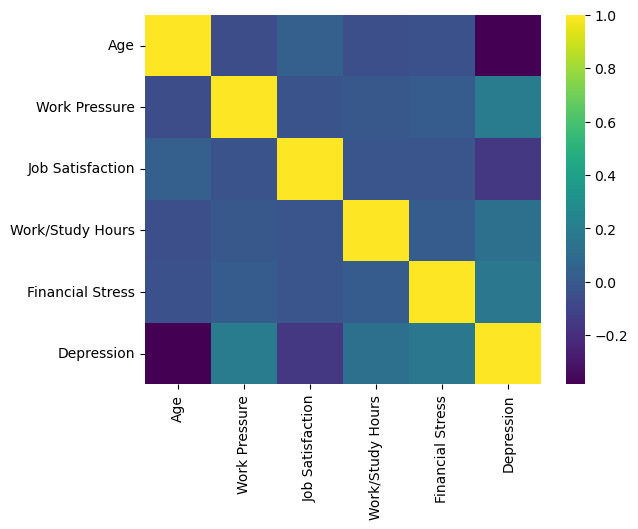

In [34]:
#To deal with cols with high frequency of null tuples
train.isnull().sum()
# train.columns
temp_train = train.copy() #Making a copy for safety purposes

#The plan is to check for corr between the numerical cols and then subsequently with the 'Profession' feature
temp_train.dropna(axis=0, inplace=True, how='any')         #Remove any tuples with null values - simplify the corr process
# lol = temp_train.groupby('Profession')
corr_with_target = temp_train.select_dtypes(exclude=['object'])
corr_without_target = temp_train.select_dtypes(exclude=['object']).drop('Depression', axis=1)


print(sns.heatmap(corr_with_target.corr(), cmap = 'viridis'))
corr_with_target.corr()

In [35]:
#There are rows with the same profession as the name
#We need to remove these first
no_rows_prof_equal = train[train['Name'] == train['Profession']]['id'].count()   #6
#Since there are only six rows with same name as profession, we can drop them as well
train = train[train['Name'] != train['Profession']]

KeyError: 'Name'